In [4]:
import os
import glob
import matplotlib.pyplot as plt
import keras
import json
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [5]:
train_dir ="/content/drive/MyDrive/tomato/train"
test_dir="/content/drive/MyDrive/valid"

In [6]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [7]:
import os
import glob
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

10 Classes
6390 Train images
12896 Test images


In [8]:
# Preprocessing data
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
# setting height and width of image
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 6389 images belonging to 10 classes.
Found 12895 images belonging to 8 classes.


In [10]:
# All diseases
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [11]:
#CNN Model
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [12]:
model_layers = [layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


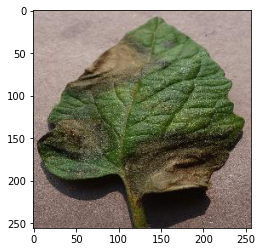

In [13]:
from keras.preprocessing import image
import numpy as np
img = image.load_img('/content/drive/MyDrive/valid/Tomato_Late_blight/00355ec2-f12c-4015-b8f9-94354f69ce22___RS_Late.B 5311.JPG')
plt.imshow(img)
#Processing image
img1 = image.load_img('/content/drive/MyDrive/valid/Tomato_Late_blight/00355ec2-f12c-4015-b8f9-94354f69ce22___RS_Late.B 5311.JPG', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [14]:
#Output of image
from keras.models import Model
conv2d_output = Model(inputs=model.input, outputs=model.get_layer('conv2d').output)
max_pooling2d_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d').output)

conv2d_1_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)

conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)

flatten_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)

conv2d_features = conv2d_output.predict(img)
max_pooling2d_features = max_pooling2d_output.predict(img)

conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)

conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)

flatten_features = flatten_output.predict(img)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


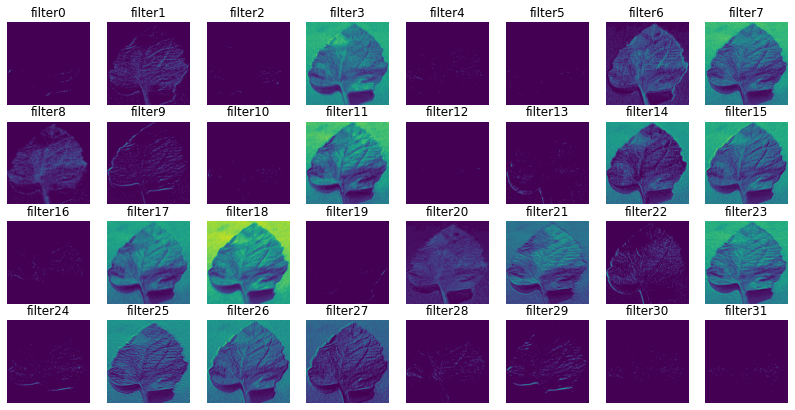

In [15]:
#Visualization at all layers
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_features[0, :, :, i], cmap='viridis') # Visualizing in color mode.
plt.show()

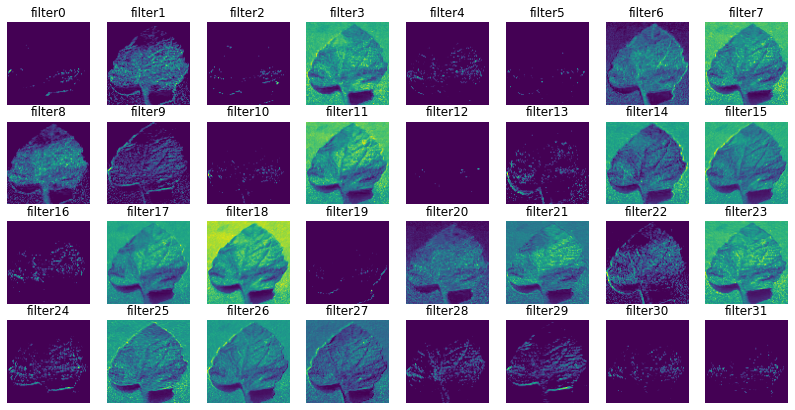

In [16]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_features[0, :, :, i], cmap='viridis')
plt.show()

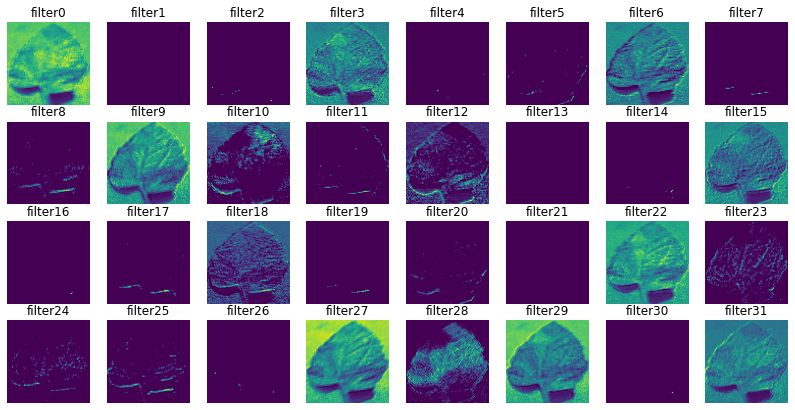

In [17]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

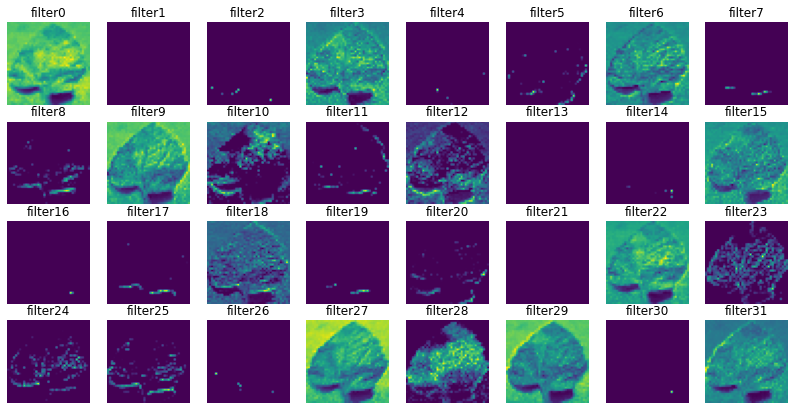

In [18]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis') 
plt.show()

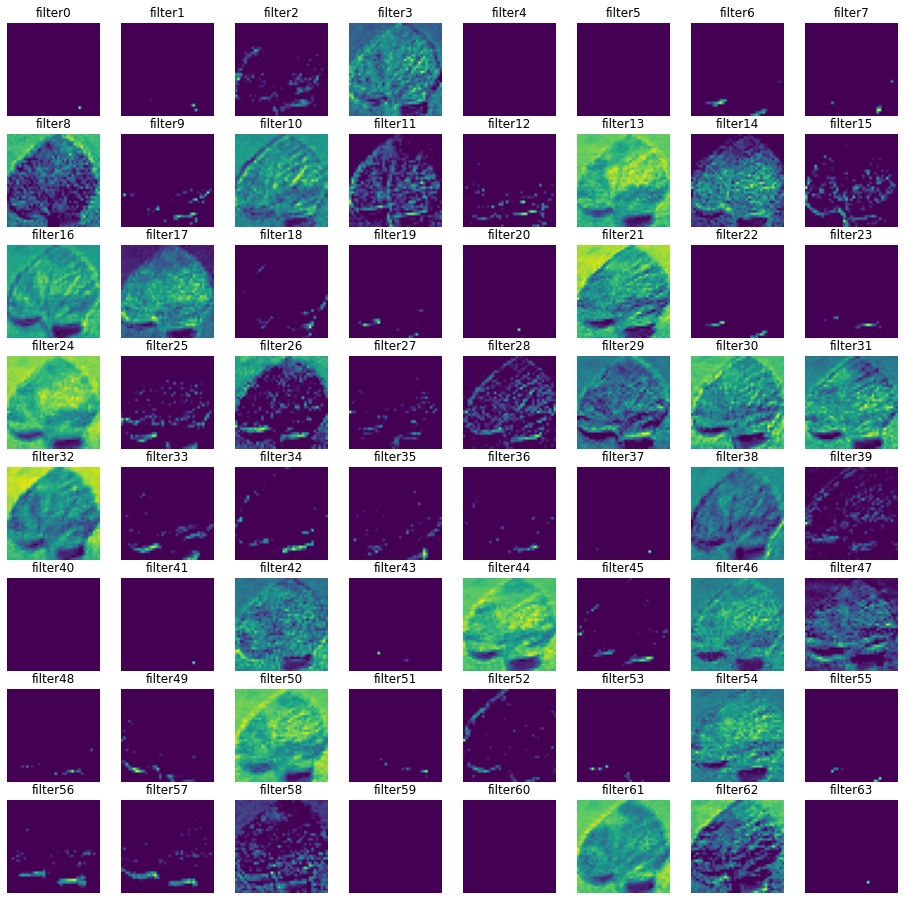

In [19]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(16,16))
columns =8 
rows = 8
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(conv2d_2_features[0, :, :, i], cmap='viridis')
plt.show()

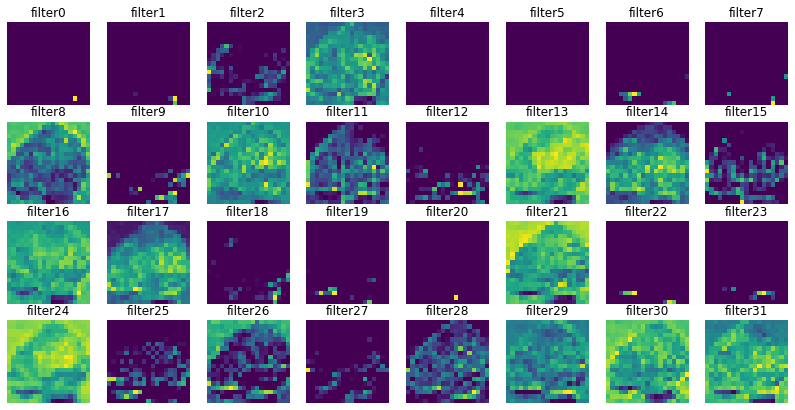

In [20]:
import matplotlib.image as mpimg
fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_2_features[0, :, :, i], cmap='viridis') 
plt.show()

In [21]:
#Validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size)

Found 6389 images belonging to 10 classes.


In [23]:
#Model Training
import tensorflow as tf
opt=tf.optimizers.Adam(learning_rate=0.003)
#opt=keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit(train_generator,
                          epochs=5,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)

Epoch 1/5
199/199 [==============================] - 1406s 7s/step - loss: 0.7674 - accuracy: 0.6748 - val_loss: 0.5704 - val_accuracy: 0.7836
Epoch 2/5
199/199 [==============================] - 733s 4s/step - loss: 0.4780 - accuracy: 0.8111 - val_loss: 0.4109 - val_accuracy: 0.8442
Epoch 3/5
199/199 [==============================] - 772s 4s/step - loss: 0.3736 - accuracy: 0.8562 - val_loss: 0.2826 - val_accuracy: 0.9014
Epoch 4/5
199/199 [==============================] - 747s 4s/step - loss: 0.3102 - accuracy: 0.8797 - val_loss: 0.2565 - val_accuracy: 0.9061
Epoch 5/5
199/199 [==============================] - 746s 4s/step - loss: 0.2170 - accuracy: 0.9224 - val_loss: 0.1738 - val_accuracy: 0.9304


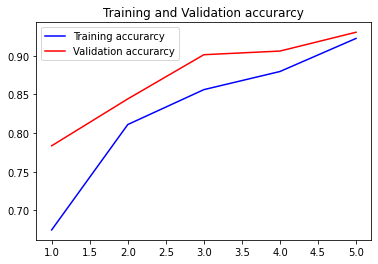

In [24]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.show()

In [25]:
#Saving model
from keras.models import load_model
model.save('leaf.h5')

In [26]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("leaf.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("leaf.h5")
print("Loaded model from disk")

Loaded model from disk


In [28]:
classes = train_generator.class_indices
print(classes)

{'Tomato_Bacterial_spot': 0, 'Tomato_Early_blight': 1, 'Tomato_Late_blight': 2, 'Tomato_Leaf_Mold': 3, 'Tomato_Septoria_leaf_spot': 4, 'Tomato_Spider_mites_Two_spotted_spider_mite': 5, 'Tomato__Target_Spot': 6, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7, 'Tomato__Tomato_mosaic_virus': 8, 'Tomato_healthy': 9}


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
# Pre-Processing testdata
img_width=256
img_height=256

from keras.preprocessing import image
def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
  

In [30]:
classes

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

[[3.1888026e-09 2.4756089e-10 9.8650483e-09 5.2570831e-10 1.5089895e-09
  4.3521845e-03 2.7358264e-03 1.0702688e-02 9.8220932e-01 8.8023828e-09]]
probability:0.9822093
Leaf is diseased


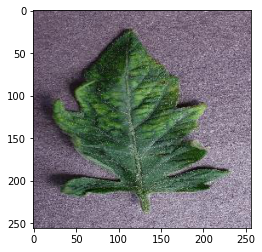

In [77]:
result = model.predict([prepare('/content/drive/MyDrive/valid/Tomato__Tomato_mosaic_virus/227c893f-5a46-4df3-859d-ba3a74e4cb82___PSU_CG 2277.JPG')])
disease=image.load_img('/content/drive/MyDrive/valid/Tomato__Tomato_mosaic_virus/227c893f-5a46-4df3-859d-ba3a74e4cb82___PSU_CG 2277.JPG')
plt.imshow(disease)
print(result)
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result)))
if list(result) in list(classes):
  print("Healthy")
else:
  print("Leaf is diseased")

probability:0.993334
 Leaf is Healthy


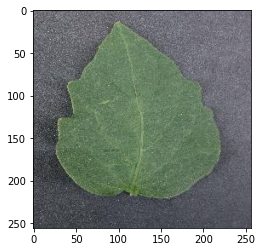

In [73]:
result = model.predict([prepare('/content/drive/MyDrive/valid/Tomato_healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG')])
disease=image.load_img('/content/drive/MyDrive/valid/Tomato_healthy/000146ff-92a4-4db6-90ad-8fce2ae4fddd___GH_HL Leaf 259.1.JPG')
plt.imshow(disease)
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result)))
if list(result) not in list(classes):
  print(" Leaf is Healthy")
else:
  print("Leaf is diseased")